## Bag of Words

Array of words in a sentence, ignoring grammar and word order but keeping multiplicity.

Then build a SVM classifier to predict the class object of a sentence.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

class Category:
    CARTOLERIA = 'cartoleria'
    ABBIGLIAMENTO = 'abbigliamento'
    ANIMALI = 'animali'
    FILM = 'film'

senteces = ['I love the book', 'I love the pen', 'I love the dog', "the fit is terrible", "this is a great shoe", "the shoes are too tight", "I love the movie"]
categories = [Category.CARTOLERIA, Category.CARTOLERIA, Category.ANIMALI, Category.ABBIGLIAMENTO, Category.ABBIGLIAMENTO, Category.ABBIGLIAMENTO, Category.FILM]


In [ ]:

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(senteces)

print(vectors[0].toarray())

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(vectors, categories)

SVC(kernel='linear')

In [11]:
test_senteces = ['I bought a new book', 'it is a great movie', 'I hate the fit']
test_vectors = vectorizer.transform(test_senteces)

print(clf.predict(test_vectors)) # it fails for the middle sentence neacuse it has 3 word is a great cathegorized as abbigliamento 

['cartoleria' 'abbigliamento' 'abbigliamento']


 bigram: 2 words
 

In [13]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
print(analyze('Bi-grams are cool!'))

['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']


In [15]:
vectors = bigram_vectorizer.fit_transform(senteces)
print(vectors[0].toarray())

[[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]]


In [16]:
bigram_clf = svm.SVC(kernel='linear')
bigram_clf.fit(vectors, categories)

test_vectors = bigram_vectorizer.transform(test_senteces)
print(bigram_clf.predict(test_vectors)) # it works for the middle sentence neacuse it has 3 word is a great cathegorized as film

['abbigliamento' 'abbigliamento' 'abbigliamento']


## Word vectors

Convert the words into vectors, these vectors capture the semantic of the words.

I used spacy library to convert the words into vectors, download the model en_core_web_lg (spacy.load('en_core_web_sm')).


In [2]:
import spacy


# sentences = ["Best book I've read in years", "great story and characters", "no development of characters during the book" ]
nlp = spacy.load('en_core_web_sm')
vectors = []
for sentence in senteces:
    doc = nlp(sentence)
    vectors.append(doc.vector)  # numpy.ndarray of size 96

In [4]:
vectors[0].shape

(96,)

In [7]:
from sklearn import svm


#classify vectors
clf = svm.SVC(kernel='linear')
clf.fit(vectors, categories)


SVC(kernel='linear')

In [9]:

clf.predict([nlp("I want new books").vector]) # it fails for the middle sentence neacuse it has 3 word is a great cathegorized as abbigliamento

array(['cartoleria'], dtype='<U13')

 ### confusion matrix of cosine distance between vectors

In [25]:
parole = ['cane', 'gatto', 'topo', 'penna', 'luce', 'bambino', 'mamma']
parole_vectors = []
for parola in parole:
    parole_vectors.append(nlp(parola).vector)

[[0.9999999  0.6665492  0.49363738 0.60027087 0.43579853 0.7558749
  0.68413275]
 [0.6665492  0.9999999  0.47541052 0.5980003  0.5843311  0.5972855
  0.5502642 ]
 [0.49363738 0.47541052 0.9999999  0.635836   0.49261895 0.6223805
  0.56883806]
 [0.60027087 0.5980003  0.635836   1.         0.55968887 0.5984826
  0.5127571 ]
 [0.43579853 0.5843311  0.49261895 0.55968887 0.99999994 0.3690033
  0.25416234]
 [0.7558749  0.5972855  0.6223805  0.5984826  0.3690033  1.0000004
  0.71673846]
 [0.68413275 0.5502642  0.56883806 0.5127571  0.25416234 0.71673846
  1.0000002 ]]
1 0.6665492057800293 0.49363741278648376 0.6002708673477173
0.6665492057800293 1 0.4754105806350708 0.5980004072189331
0.49363741278648376 0.4754105806350708 1 0.6358360052108765
0.6002708673477173 0.5980004072189331 0.6358360052108765 1


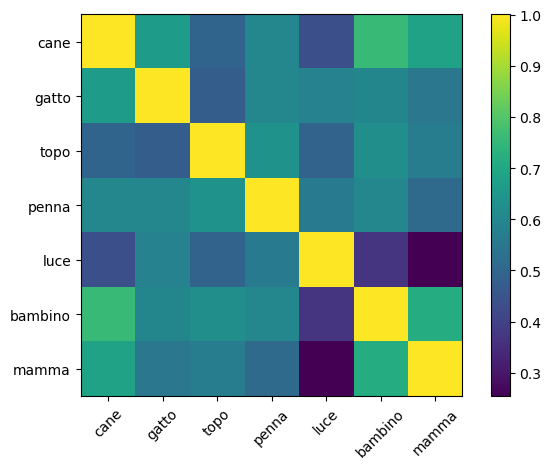

In [26]:
#similarity between vectors
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
#import confusion matrix
# from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

#compute similarity between vectors and plot them in confusion matrix
similarity = cosine_similarity(parole_vectors)
print(similarity)
# print(confusion_matrix(similarity, similarity))

#compute the similarity with scipy to see the difference
print(1- spatial.distance.cosine(parole_vectors[0], parole_vectors[0]), 1- spatial.distance.cosine(parole_vectors[0], parole_vectors[1]), 1- spatial.distance.cosine(parole_vectors[0], parole_vectors[2]), 1- spatial.distance.cosine(parole_vectors[0], parole_vectors[3]))
print(1- spatial.distance.cosine(parole_vectors[1], parole_vectors[0]), 1- spatial.distance.cosine(parole_vectors[1], parole_vectors[1]), 1- spatial.distance.cosine(parole_vectors[1], parole_vectors[2]), 1- spatial.distance.cosine(parole_vectors[1], parole_vectors[3]))
print(1- spatial.distance.cosine(parole_vectors[2], parole_vectors[0]), 1- spatial.distance.cosine(parole_vectors[2], parole_vectors[1]), 1- spatial.distance.cosine(parole_vectors[2], parole_vectors[2]), 1- spatial.distance.cosine(parole_vectors[2], parole_vectors[3]))
print(1- spatial.distance.cosine(parole_vectors[3], parole_vectors[0]), 1- spatial.distance.cosine(parole_vectors[3], parole_vectors[1]), 1- spatial.distance.cosine(parole_vectors[3], parole_vectors[2]), 1- spatial.distance.cosine(parole_vectors[3], parole_vectors[3]))

#plot the cosine similarity with colormap
plt.imshow(similarity, cmap='viridis', interpolation='nearest')
plt.colorbar()
#show the inital words in the plot
tick_marks = np.arange(len(parole))
plt.xticks(tick_marks, parole, rotation=45)
plt.yticks(tick_marks, parole)
plt.tight_layout()
